In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.datasets import make_classification

### Реализация forward и backward

In [2]:
X, y = make_classification(n_samples=700, n_features=4, random_state=42)

In [3]:
class CustomLinear(nn.Module):
    def __init__(self, X, y):
        super().__init__()
        self.X = X
        self.y = y
        self.w = np.random.randn(self.X.shape[1], 1)
        self.b = 0
            
    def sigmoid(self, X):
        return 1 / (1 + np.exp(-X))
#   логлосс
    def loss(self, y_pred, y):
        return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    
    def forward(self):
        y_pred = self.sigmoid(self.X @ self.w.reshape(self.X.shape[1], 1) + self.b)
        return y_pred.reshape(-1, 1)

    def backward(self, y, y_pred, learning_rate=0.001):
        n = len(y)
        y = np.array(y).reshape(-1, 1)
        self.w = self.w - learning_rate * (self.X.T @ (y_pred - y) / n)
        self.b = self.b - learning_rate * np.mean(y_pred - y)
        
    def fit(self, num_epochs=1000):
        loss_values = [] 
        
        for i in tqdm(range(num_epochs)):
            y_pred = self.forward()
            loss_values.append(self.loss(y_pred, self.y))
            self.backward(self.y, y_pred)
        
        return loss_values

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 162.45it/s]


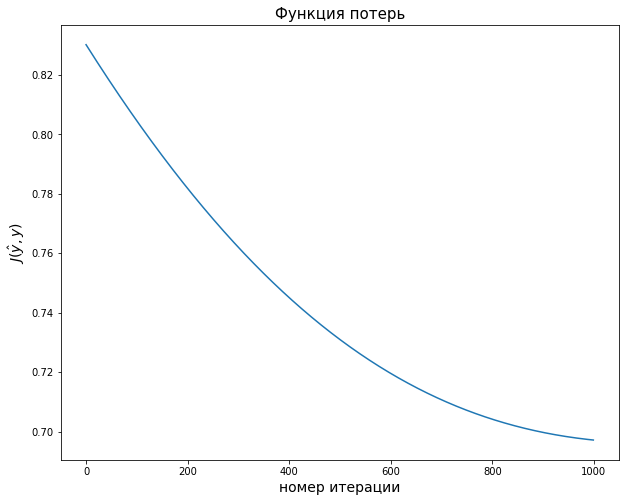

In [4]:
neuron = CustomLinear(X, y)
J_values = neuron.fit()

plt.figure(figsize=(10, 8))
plt.plot(J_values)
plt.title('Функция потерь', fontsize=15)
plt.xlabel('номер итерации', fontsize=14)
plt.ylabel('$J(\hat{y}, y)$', fontsize=14)
plt.show()

### Реализация оптимизаторов и нахождение корней квадратного уравнения

In [5]:
# Квадратное уравнение x**2 - 8*x + 2 возведем в квадрат чтобы пересечения с осью x (корни) были глобальными минимумами 
x = np.linspace(-8, 16)
y = (x**2 - 8*x + 2)**2

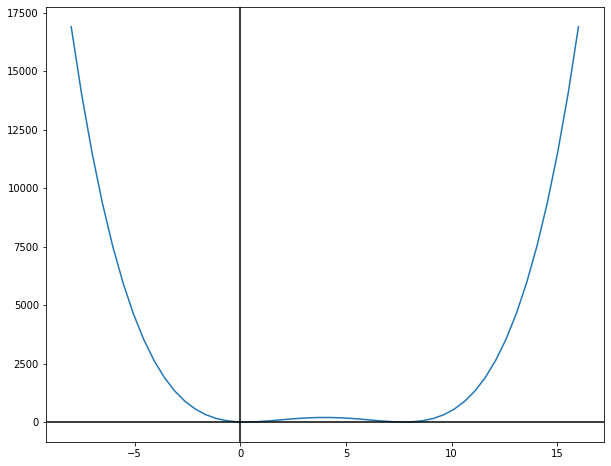

In [6]:
plt.figure(figsize=(10, 8))
plt.plot(x, y)
ax = plt.gca()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k');

In [7]:
def func(x):
    return (x**2 - 8*x + 2) ** 2

def grad_f(x):
    return 2 * (x**2 - 8*x + 2) * (2*x - 8)

In [8]:
class Adagrad:
    def __init__(self, lr, model):
        self.lr = lr
        self.model = model
        self.accumulted = 0
    
    def step(self, grad):
        self.accumulted += grad ** 2
        adapt_lr = self.lr / np.sqrt(self.accumulted)
        self.model -= adapt_lr * grad
        

In [9]:
class Adam:
    def __init__(self, lr, rho, momentum, model):
        self.lr = lr
        self.momentum = momentum
        self.velocity = 0
        self.model = model
        self.rho = rho
        self.accumulted = 0
    
    def step(self, grad):
        self.velocity = self.momentum * self.velocity + (1 - self.momentum) * grad
        self.accumulted = self.rho * self.accumulted + (1-self.rho) * grad ** 2
        adapt_lr = self.lr / np.sqrt(self.accumulted)
        self.model -= adapt_lr * self.velocity
#         print(adapt_lr)

In [10]:
def solver_Adagrad(init_x):
    x = init_x
    g = grad_f(x)
    optim = Adagrad(0.1, x)
    for i in range(10000):
        optim.step(g)
        g = grad_f(optim.model)
    return optim.model

In [11]:
def solver_Adam(init_x):
    x = init_x
    g = grad_f(x)
    optim = Adam(0.01, 0.9, 0.9, x)
    for i in range(10000):
        optim.step(g)
        g = grad_f(optim.model)
    return optim.model

### Корни уравнения при Adagrad

In [12]:
x = solver_Adagrad(-3)
print(f'Корень уравнения: {x}')
func(x)

Корень уравнения: 0.2583425364164271


3.303842981795655e-13

In [13]:
x = solver_Adagrad(6)
print(f'Корень уравнения: {x}')
func(x)

Корень уравнения: 7.74165738677392


2.6707674807162576e-26

### Корни уравнения при Adam

In [14]:
x = solver_Adam(-10)
print(f'Корень уравнения: {x}')
print(f'Погрешность: {func(x)}')

Корень уравнения: 0.25845488394811234
Погрешность: 7.058428619817859e-07


In [15]:
x = solver_Adam(10)
print(f'Корень уравнения: {x}')
print(f'Погрешность: {func(x)}')

Корень уравнения: 7.741855846914986
Погрешность: 2.2057569349355915e-06
